### Data Preparation

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
merge_df.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1


In [3]:
# Checking the number of mice.
mouse_count = len(pd.unique(merge_df['Mouse ID']))
print(f"Number of mice: {mouse_count}")

Number of mice: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = merge_df[merge_df["Mouse ID"].duplicated() == True]
dupes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12.827251,25.593674,22.536496,51.273592,1.176399
std,7.185777,3.951053,12.705351,9.269633,1.144157
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,10.000000,46.035588,0.000000
50%,13.000000,26.000000,20.000000,50.539831,1.000000
75%,20.000000,29.000000,35.000000,57.309933,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dupes = merge_df.drop_duplicates(subset="Mouse ID", keep='last', inplace=False, ignore_index=False)
no_dupes.head(3)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0


In [7]:
# Checking the number of mice in the clean DataFrame. Should match earlier unique mouse ID count
nd_mouse_count = len(no_dupes.index)
print (f"New Number of mice: {nd_mouse_count}")

New Number of mice: 249


### Summary Statistics

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
no_dupes.info()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumor_stats_drug = no_dupes.groupby(["Drug Regimen"])

# Mean
tumor_volume_mean = (tumor_stats_drug["Tumor Volume (mm3)"]).mean()
#print(tumor_volume_mean)

# Median
tumor_volume_median = (tumor_stats_drug["Tumor Volume (mm3)"]).median()
#print(tumor_volume_median)

# Variance
tumor_volume_var = (tumor_stats_drug["Tumor Volume (mm3)"]).var()
print(tumor_volume_var)

# Standard Deviation
tumor_volume_std = (tumor_stats_drug["Tumor Volume (mm3)"]).std()
#print(tumor_volume_std)

# SEM of the tumor volume. 
tumor_volume_sem = (tumor_stats_drug["Tumor Volume (mm3)"]).sem()
#print(tumor_volume_sem)

# Assemble the resulting series into a single summary DataFrame.
tumor_volume_df = pd.DataFrame({
    "TV Mean" : [tumor_volume_mean],
    "TV Median" : [tumor_volume_median],
    "TV Variance" : [tumor_volume_var],
    "TV Standard Dev" : [tumor_volume_std],
    "TV Standard Error" : [tumor_volume_sem],
})
print(tumor_volume_df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 9 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            249 non-null    object 
 1   Drug Regimen        249 non-null    object 
 2   Sex                 249 non-null    object 
 3   Age_months          249 non-null    int64  
 4   Weight (g)          249 non-null    int64  
 5   Timepoint           249 non-null    int64  
 6   Tumor Volume (mm3)  249 non-null    float64
 7   Metastatic Sites    249 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 25.6+ KB
Drug Regimen
Capomulin     32.663378
Ceftamin      69.982735
Infubinol     74.010875
Ketapril      98.921330
Naftisol     106.029927
Placebo       78.759797
Propriva      69.349002
Ramicane      32.166354
Stelasyn      90.331586
Zoniferol     76.862027
Name: Tumor Volume (mm3), dtype: float64
                                             TV 

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


In [ ]:
### Bar and Pie Charts

In [27]:
# Creating dataframe grouped by drug regimin for following bar plot and pyplot
grouped_drug_df = merge_df.groupby(["Drug Regimen"])
#print(grouped_drug_df)
#grouped_drug_df.count().head(10)
timepoints = grouped_drug_df["Timepoint"].sum()
#print (timepoints)
timepoints_df = pd.DataFrame({"Timepoints Total":timepoints})
print(timepoints_df)

              Timepoints Total
Drug Regimen                  
Capomulin                 4960
Ceftamin                  3515
Infubinol                 3235
Ketapril                  3705
Naftisol                  3650
Placebo                   3380
Propriva                  2715
Ramicane                  4885
Stelasyn                  3480
Zoniferol                 3525


In [37]:
# Creating index of Drug Regimens for following bar plot and pyplot
drug_regimen = timepoints_df[timepoints_df

KeyError: 'Drug Regimen'

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.




KeyError: 'Drug Regimen'

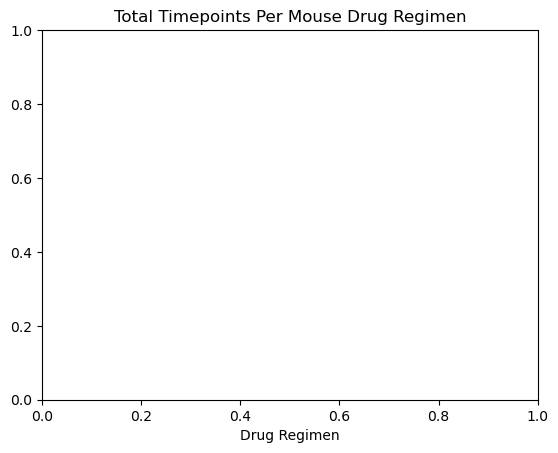

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.title("Total Timepoints Per Mouse Drug Regimen")
ttpts = [timepoints_df["Timepoints Total"]]
plt.xlabel("Drug Regimen")
x_axis = timepoints_df["Drug Regimen"]
plt.ylabel("Total Timepoints")
timepoints_bar_py = plt.bar(x_axis, ttpts, color="r" )

In [36]:
#plt.subplot(221)
#plt.gca().set_title('New York',y=.75)
#c = final_NY_con['cuisine'].apply(lambda x: colors[x])
labels = timepoints_df['Drug Regimen']
sizes = timepoints_df['timepoints']
pybars = plt.bar(labels,sizes,color='r')
plt.tick_params(axis='x', which='both', labelbottom=True, tickdir='out', rotation=45)


KeyError: 'Drug Regimen'

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


In [ ]:
### Quartiles, Outliers, and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



In [ ]:
### Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


In [ ]:
### Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

